# Exploring Social Inequity Through Machine Learning: Analyzing Bias in Healthcare

### Healthcare Outcomes

#### Data

In [10]:
# Importing and Cleaning PoorHealthByRace Dataset
import pandas as pd

# Load the data
health = pd.read_csv('PoorHealthByRace.csv', delimiter=';', quotechar='"')

# Split the combined column into separate columns
health_split = health.iloc[:, 0].str.split(',', expand=True)

# Assign the correct column names
health_split.columns = ['Location', 
                        'All Adults', 
                        'White', 
                        'Black', 
                        'Hispanic', 
                        'Asian/Native Hawaiian or Pacific Islander', 
                        'American Indian or Alaska Native', 
                        'Other', 
                        'Footnotes']

# Drop the first row (index 0) and second row (index 1)
health_split = health_split.drop(index=[0, 1])

# Reset the row index to 0
health_split = health_split.reset_index(drop=True)

# Remove the last 15 rows
health_split = health_split.iloc[:-15]

# Remove the Footnotes column
health_split = health_split.drop(columns=['Footnotes'])

# Remove quotes around values
health_split = health_split.applymap(lambda x: x.strip('"') if isinstance(x, str) else x)

# Replace 'Unknown' and empty strings with NaN for handling
health_split.replace(['Unknown', ''], pd.NA, inplace=True)

# Convert numerical columns to float for ratio-based calculations
columns_to_convert = ['All Adults', 'White', 'Black', 'Hispanic', 
                      'Asian/Native Hawaiian or Pacific Islander', 
                      'American Indian or Alaska Native', 'Other']
for col in columns_to_convert:
    health_split[col] = pd.to_numeric(health_split[col], errors='coerce')
    
# Impute missing (NaN) values in ratio columns with the median of each column
for col in columns_to_convert:
    health_split[col].fillna(health_split[col].median(), inplace=True)

In [11]:
### Display Data before Cleaning

health

,Title: Adults Who Report Fair or Poor Health Status by Race/Ethnicity | KFF
0,Timeframe: 2022
1,"Location,""All Adults"",""White"",""Black"",""Hispani..."
2,"United States,""0.179"",""0.159"",""0.210"",""0.234"",..."
3,"Alabama,""0.232"",""0.221"",""0.258"",""0.256"",""NSD"",..."
4,"Alaska,""0.157"",""0.143"",""0.235"",""0.148"",""0.113""..."
...,...
64,*NSD*: Not sufficient data.
65,NaN
66,*N/A*: Not applicable; US Virgin Islands is on...
67,Footnotes


In [12]:
#Display Cleaned Data

health_split

,Location,All Adults,White,Black,Hispanic,Asian/Native Hawaiian or Pacific Islander,American Indian or Alaska Native,Other
0,United States,0.179,0.159,0.210,0.234,0.107,0.288,0.218
1,Alabama,0.232,0.221,0.258,0.256,0.110,0.290,0.348
2,Alaska,0.157,0.143,0.235,0.148,0.113,0.200,0.180
3,Arizona,0.192,0.167,0.173,0.229,0.175,0.250,0.267
4,Arkansas,0.238,0.223,0.307,0.222,0.110,0.218,0.276
5,California,0.182,0.135,0.204,0.245,0.124,0.393,0.180
6,Colorado,0.140,0.121,0.219,0.186,0.098,0.248,0.137
7,Connecticut,0.144,0.117,0.179,0.240,0.110,0.285,0.221
8,Delaware,0.166,0.148,0.207,0.191,0.110,0.285,0.205
9,District of Columbia,0.115,0.046,0.204,0.216,0.110,0.285,0.221


#### Question
What is the relationship between race/ethnicity and the percentage of people reporting poor health in the U.S.?

### Method 1: Linear Regression

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Define target variable (percentage of people reporting poor health)
y = health_split['All Adults'].astype(float)

# Features: Use race/ethnicity as predictors
X = health_split[['White', 'Black', 'Hispanic', 'Asian/Native Hawaiian or Pacific Islander', 
                  'American Indian or Alaska Native', 'Other']]  

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared (Goodness of fit)

# Print results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# To see predicted vs actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)

Mean Squared Error: 0.00017609254675777052
R-squared: 0.653609081842726
    Actual  Predicted
19   0.217   0.200905
41   0.175   0.165611
47   0.168   0.164266
12   0.140   0.130351
43   0.204   0.188640
5    0.182   0.164341
17   0.160   0.156255
50   0.161   0.170738
3    0.192   0.177627
32   0.202   0.177447
13   0.157   0.161082


#### Visualization

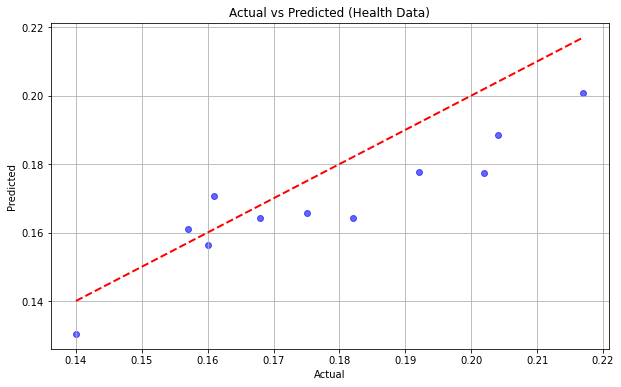

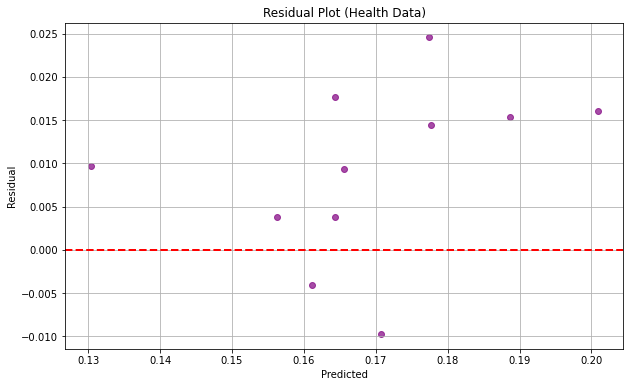

In [14]:
import matplotlib.pyplot as plt

# Visualize Actual vs. Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', lw=2)
plt.title('Actual vs Predicted (Health Data)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()
plt.show()

# Residual plot to assess model errors
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='purple', alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot (Health Data)')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.grid()
plt.show()

#### Analysis

The Linear Regression model explains about 65.4% of the variation in poor health outcomes based on demographic factors which confirms a linear relationship between race and ethnicity and the reported poor health percentages. Each one of the race and ethnicity variables contributes to explaining the difference in health outcomes, while the model points to disparities in poor health rates across racial groups.

The MSE value of 0.0001761 tells us that the model's predictions are very close to the actual data and therefore a good fit. The R-squared value highlights the importance of race and ethnicity but also suggests that other factors like income, education, access to healthcare, and geographic disparities account for the remaining variance. Small residuals also indicate a strong model fit, and the predictions can be reliable for understanding the trends and general relationships.

### Method 2: Random Forests

In [15]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data (using already split data)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame to view feature importances
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print("\nFeature Importances:")
feature_importance_df

Mean Squared Error: 0.000147389863636363
R-squared: 0.710070010729615

Feature Importances:


,Feature,Importance
0,White,0.847133
1,Black,0.083498
5,Other,0.034691
2,Hispanic,0.024500
4,American Indian or Alaska Native,0.005245
3,Asian/Native Hawaiian or Pacific Islander,0.004932


#### Visualization

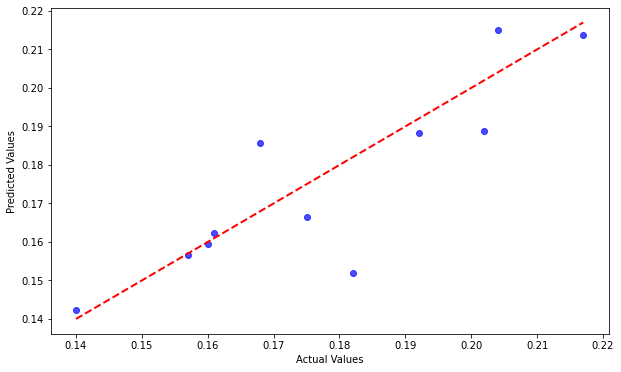

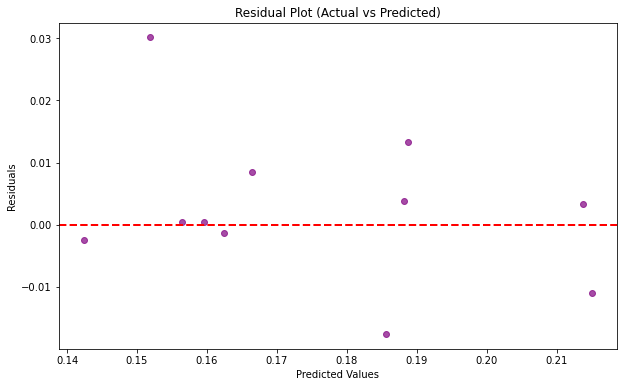

In [16]:
# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Residuals plot
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='purple', alpha=0.7)
plt.axhline(0, color='red', linestyle='--', lw=2)  # Zero residuals line
plt.title('Residual Plot (Actual vs Predicted)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

#### Analysis

The Random Forest explains about 71.1% of the variation in poor health outcomes based on race and ethnicity. The Random Forest model performed better compared to linear regression, telling us that the relationship between racial and ethnic demographics and health disparities is partly non-linear.

The MSE value of 0.0001474 suggests that the model's predictions are highly accurate. There are minimal differences between the predicted and actual data points, also showing the improved fit of this model. The "White" feature being at the top of the importance list tells us that disparities within the White population greatly influence health outcomes which could be because of the high variation in demographic conditions among this group. 

The relatively low importance of smaller racial groups, such as American Indian or Alaska Native and Asian/Native Hawaiian or Pacific Islander, may be because of underrepresentation or lower variance within the dataset among these groups. This does not take away from their significance in real-world contexts but instead points to limitations in the data used for the analysis.

### Method 3: Decison Tree

In [17]:
from sklearn.tree import DecisionTreeRegressor

# Define target variable (percentage of people reporting poor health)
y = health_split['All Adults'].astype(float)

# Features: Use race/ethnicity as predictors
X = health_split[['White', 'Black', 'Hispanic', 'Asian/Native Hawaiian or Pacific Islander', 
                  'American Indian or Alaska Native', 'Other']]  

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Model
model = DecisionTreeRegressor(random_state=105)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared (Goodness of fit)

# Print results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# To see predicted vs actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)

Mean Squared Error: 0.00019672727272727282
R-squared: 0.6130185979971385
    Actual  Predicted
19   0.217      0.213
41   0.175      0.171
47   0.168      0.180
12   0.140      0.141
43   0.204      0.219
5    0.182      0.150
17   0.160      0.166
50   0.161      0.151
3    0.192      0.180
32   0.202      0.185
13   0.157      0.144


#### Visualization

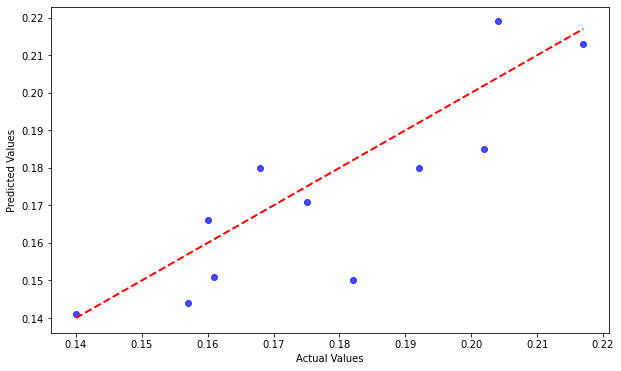

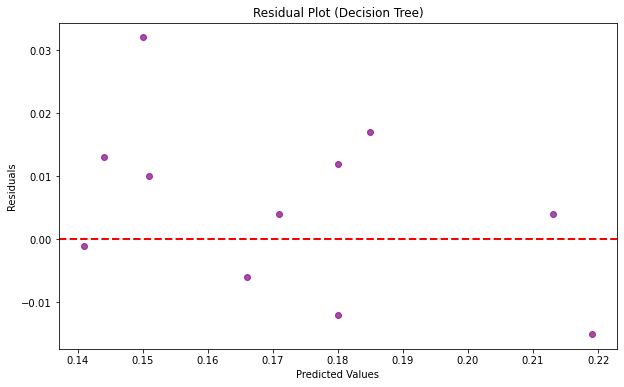

In [18]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Residuals plot
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='purple', alpha=0.7)
plt.axhline(0, color='red', linestyle='--', lw=2)  # Zero residuals line
plt.title('Residual Plot (Decision Tree)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

#### Analysis

The Decision Tree model explains about 61.3% of the variation in poor health outcomes based on race and ethnicity. It shows meaningful relationships between race and ethnicity and health disparities. The low Mean Squared Error of 0.000197 tells us that we have reasonably accurate predictions. There are small differences between actual and predicted values, such as an actual value of 0.217 being predicted as 0.213. But, there are some notable outliers, such as a 0.182 actual value predicted as 0.150, suggesting room for improvement in finding certain patterns.

The residuals are distributed around zero, showing no significant bias in the model's predictions. This enhances its reliability for general insights. The Decision Tree model provides useful understanding of health disparities, but it performs slightly less effectively than Linear Regression and a lot less effectively than the Random Forest model, showing its limitations in capturing more complex, non-linear interactions.

## Conclusion

This project shows the important role of demographic factors like race and ethnicity in understanding health outcome disparities across the United States. Using Linear Regression, Decision Tree, and Random Forest I uncovered hidden insights about these disparities. Each model had its strengths, but the Random Forest model was the most effective at capturing non-linear relationships and subtle interactions that other approaches missed.

While the models illustrated the role of racial and ethnic demographics as a key predictor of poor health outcomes, they also show there is need for including other variables like income, education, and access to healthcare to account for the remaining variance. There are limitations in the dataset, such as underrepresentation of smaller racial groups. Data-driven insights must be interpreted within their broader social and historical contexts.

Machine learning proved to be useful in the analysis of a complex social issues, such as health inequity. Further work might extend this analysis by incorporating more diverse data sets and exploring interactions among a wider array of variables that might shed light on pathways to health equity.